In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import sklearn.datasets
from scipy.stats import multivariate_normal
import pandas as pd
import seaborn

import sys
sys.version_info

sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)

In [4]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True  # Use per default a grid, i.e. plt.grid()

### Useful keyboard shortcuts for working in a Jupyter notebook
- `Tab`: Code completion or indent
- `Shift-Tab`: Tooltip
- `Shift-Tab Shift+Tab`: Long tooltip
- `Ctrl-Enter`: Run selected cells
- `Shift-Enter`: Run cell, select below
- `Alt-Enter`: Run cell and insert below
- `Ctrl-#`: Comment
- `Esc a`: New cell above
- `Esc b`: New cell below
- `Esc d d`: Delete current cell
- `Esc m`: Turn current cell into Markdown cell
- `Esc y`: Turn current cell into code cell

# Dataset: Iris

![1*f6KbPXwksAliMIsibFyGJw.png](https://miro.medium.com/max/700/1*f6KbPXwksAliMIsibFyGJw.png)

<!-- Source https://towardsdatascience.com/the-iris-dataset-a-little-bit-of-history-and-biology-fb4812f5a7b5 -->

The dataset contains measurements of the sepals' and petals' width and height along with the iris type for each flower. The task is to classify the flower type based on these measurements.

| English | Description | German
|:--- |:--- |:---
|Iris | flowering plant genus | Schwertlilien
|Iris setosa | iris type | Borsten-Schwertlilie
|Iris versicolor | iris type | Verschiedenfarbige Schwertlilie
|Iris virginica | iris type | Virginische Schwertlilie
|Sepal | Leaf type | Kelchblatt
|Petal | Leaf type | Blütenblatt

# Understand the dataset

In [5]:
ds = sklearn.datasets.load_iris()
print(ds['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [6]:
ds.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

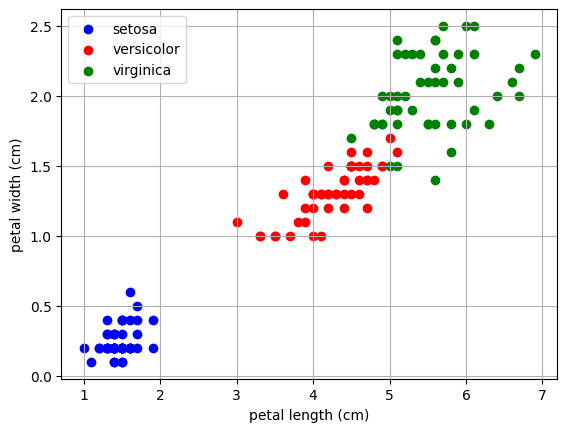

In [7]:
def add_scatter_to_plot(ds):
    colors = ['blue', 'red', 'green']
    for target_index, (target_name, color) in enumerate(zip(ds['target_names'], colors)):
        X = ds['data'][ds['target'] == target_index, :]
        plt.scatter(X[:, 2], X[:, 3], c=color, label=target_name)
    plt.legend()
    plt.xlabel(ds['feature_names'][2])
    plt.ylabel(ds['feature_names'][3])

add_scatter_to_plot(ds)
plt.show()

# a) Two class Logistic Regression

Discriminate between "virginica" and "not virginica".

- The posterior probabilities of a two class problem shall be estimated using logistic regression.
- Define and plot the sigmoid function.
- Start with the logistic regression loglikelihood function (script Eq. (2.43) and derive a gradient based iterative update scheme for the parameters $\mathbf w$ and $w_0$.

Text(0, 0.5, 'sigmoid(x)')

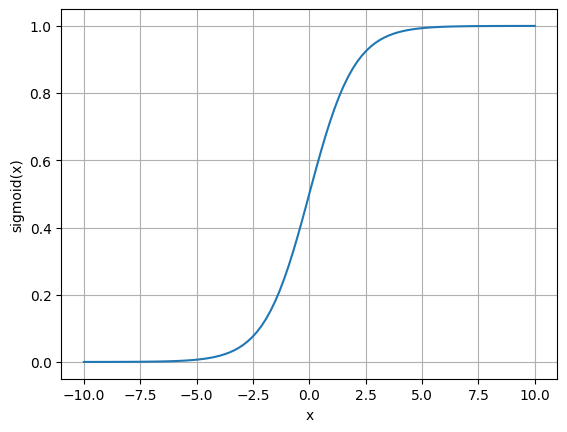

In [8]:
def sigmoid(x):
    return 1. / (1 + np.exp(-x))  # REPLACE return ???

x = np.linspace(-10, 10, num=100)
plt.plot(x, sigmoid(x))
plt.xlabel('x')
plt.ylabel('sigmoid(x)')

The loglikelihood function (script Eq. (2.43)) is:
\begin{align}
\ell( w_0, \mathbf w) &= \sum_{n=1}^N \bigg(
\tilde c_n \ln \, \sigma(\mathbf w^{\mathsf T}\mathbf x_n + w_0) + (1-\tilde c_n)\ln\,\big(1-\sigma(\mathbf w^{\mathsf T}\mathbf x_n + w_0)\big)
\bigg) \\
\tilde c_n &\in \{0, 1\}
\end{align}

The sigmoid function is defined as follows:
\begin{align}
\sigma(x) = \frac{1}{1+\mathrm e^{-x}} &= (1+\mathrm e^{-x})^{-1}
\end{align}

To simplify the matter, lets first find a nice derivative for the sigmoid function.

Find a form which just depends on $\sigma(x)$ and not directly on $e^{()}$ or $\sigma(-x)$
\begin{align}
\frac{\partial \sigma(x)}{\partial x}
&= -\frac{1}{(1+\mathrm e^{-x})^2} \cdot \mathrm e^{-x} \cdot (-1) \\  % REPLACE &= \color{red}{???}
&= \frac{\mathrm e^{-x}}{(1+\mathrm e^{-x})^2} \\  % REPLACE
&= \color{red}{\frac{1}{1+\mathrm e^{-x}}} \cdot \color{green}{\frac{\mathrm e^{-x}}{1+\mathrm e^{-x}}} \\  % REPLACE
&= \color{red}{\sigma(x)} \cdot \color{green}{(1-\sigma(x))}  % REPLACE
\end{align}

Lets now find the derivatives of the cost function itself.

\begin{align}
\frac{\partial\ell}{\partial w_0}
&= \sum_{n=1}^N \bigg(  % REPLACE &= \color{red}{???}
\tilde c_n \cdot \frac{1}{\sigma(\dots)} \cdot \sigma(\dots) \cdot \big(1-\sigma(\dots)\big)  % REPLACE
+ (1 - \tilde c_n) \cdot \frac{1}{1-\sigma(\dots)} \cdot (-1) \sigma(\dots) \cdot \big(1-\sigma(\dots)\big)  % REPLACE
\bigg) \\  % REPLACE
&= \sum_{n=1}^N \bigg(  % REPLACE
\tilde c_n \big(1-\sigma(\dots)\big)  % REPLACE
- (1 - \tilde c_n) \sigma(\dots)  % REPLACE
\bigg) \\  % REPLACE
&= \sum_{n=1}^N \bigg(  % REPLACE
\tilde c_n - \sigma(\mathbf w^{\mathsf T} \mathbf x_n + w_0)  % REPLACE
\bigg)  % REPLACE
\end{align}

\begin{align}
\frac{\partial\ell}{\partial w_d}
&= \sum_{n=1}^N \bigg(  % REPLACE &= \color{red}{???}
\tilde c_n \cdot \frac{1}{\sigma(\dots)} \cdot \sigma(\dots) \cdot \big(1-\sigma(\dots)\big) x_{d,n}  % REPLACE
+ (1 - \tilde c_n) \cdot \frac{1}{1-\sigma(\dots)} \cdot (-1) \sigma(\dots) \cdot \big(1-\sigma(\dots)\big) x_{d,n}  % REPLACE
\bigg) \\  % REPLACE
&= \sum_{n=1}^N x_{d,n} \bigg(  % REPLACE
\tilde c_n \big(1-\sigma(\dots)\big)  % REPLACE
- (1 - \tilde c_n) \sigma(\dots)  % REPLACE
\bigg) \\  % REPLACE
&= \sum_{n=1}^N x_{d,n} \bigg(  % REPLACE
\tilde c_n - \sigma(\mathbf w^{\mathsf T} \mathbf x_n + w_0)  % REPLACE
\bigg)  % REPLACE
\end{align}

Based on these gradients a gradient ascent algorithm can be defined as follows:
\begin{align}
\mathbf w^{(\kappa + 1)}
&= \mathbf w^{(\kappa)} + \mu \left.\frac{\partial\ell}{\partial \mathbf w}\right|_{w_0^{(\kappa)}, \mathbf w^{(\kappa)}} &  % REPLACE &= \color{red}{???} &
w_0^{(\kappa + 1)}
&= w_0^{(\kappa)} + \mu \left.\frac{\partial\ell}{\partial \mathbf w}\right|_{w_0^{(\kappa)}, \mathbf w^{(\kappa)}}  % REPLACE &= \color{red}{???}
\end{align}

Lets define `features` and `labels` with a fixed shape. This will ease comparability of the code used later on.

In [9]:
features = ds['data'][:, 2:]
features.shape

(150, 2)

In [10]:
labels = (ds['target'] == 2)
labels.shape

(150,)

We need to multiply the `features` and weight vector `w` along the feature dimension and then perform the summation. This is what corresponds to $\mathbf w^{\mathsf T}\mathbf x_n$ in math notation.

Possible ways:

- `np.sum(w[None, :] * features, axis=-1)`: Here, `None` introduces a singleton dimension in `w`. Then elementwise multiplication uses broadcasting.
- `features @ w`: Multiplies the last dimension of `features` with the first dimension of `w`.
- `einsum('nd,d->n', features, w)`: Here, since `d` appears more than once, multiplication and summation is performed along that axis. Check the [Einsum documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.einsum.html).

All presented ways use low-level C or Fortran code to perform the loop iterations.
Decide for yourself, which one genereralizes well and stays readable.

In [11]:
D = 2
w = np.zeros((D,))
w0 = np.zeros(())

# iterations: number of update steps
iterations = 1000  # REPLACE iterations = ???
learning_rate = 0.1  # REPLACE learning_rate = ???
for _ in range(iterations):
    grad_w0 = np.sum(labels - sigmoid(features @ w + w0), axis=0)  # REPLACE grad_w0 = ???
    grad_w = np.sum(  # REPLACE grad_w = ???
        ((labels - sigmoid(features @ w + w0)))[:, None] * features,  # REPLACE
        axis=0  # REPLACE
    )  # REPLACE
    
    assert grad_w0.shape == (), grad_w0.shape
    assert grad_w.shape == (D,), grad_w.shape
    
    # Gradient ascent, since we want to maximize the log-likelihood.
    w0 = w0 + learning_rate * grad_w0  # REPLACE w0 = ???
    w = w + learning_rate * grad_w  # REPLACE w = ???
    
    assert w.shape == (D,), w.shape
    assert w0.shape == (), w0.shape

w, w0

(array([18.39789085, 56.37826298]), -180.7631049593287)

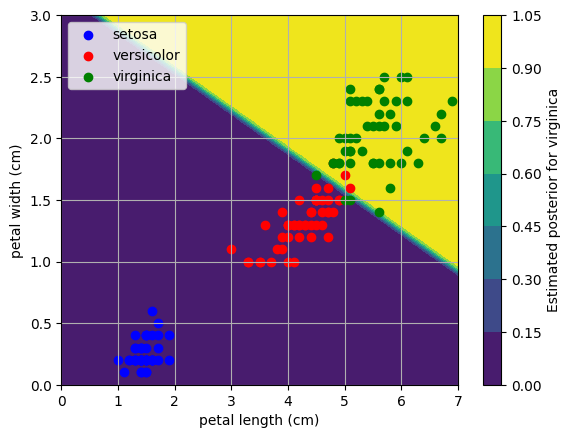

In [12]:
def compute_complete_grid(xlim, ylim, steps):
    x, y = np.meshgrid(
        np.linspace(*xlim, steps),
        np.linspace(*ylim, steps)
    )
    features_grid = np.moveaxis(np.array([x, y]), source=0, destination=-1)
    assert features_grid.shape == (steps, steps, 2), features_grid.shape
    return x, y, features_grid

steps = 100
x, y, features_grid = compute_complete_grid((0, 7), (0, 3), steps=steps)

z = sigmoid(features_grid @ w + w0)

plt.contourf(x, y, z)
plt.clim(0, 1)
plt.colorbar(label='Estimated posterior for virginica')

add_scatter_to_plot(ds)
plt.show()

# Linear Discriminant Analysis (LDA)

$p({\bf x} | \omega_k) = \mathcal N({\bf x}; {\boldsymbol \mu_k} , {\bf \Sigma})$

## Discriminant

$g_k({\bf x}) = \ln p({\bf x}, \omega_k)$

## Decision Rule

$\hat \omega = \underset{\omega_k}{\operatorname{argmax}} \{g_k({\bf x})\}$

$\dots$ (Same as first exercise about Bayes Decision rule, when considering only 2 classes)

### Solution for 2 classes

${\bf w} = {\bf \Sigma}^{-1} (\boldsymbol \mu_k - \boldsymbol \mu_c)$

$\mathbf x_0 = \frac{1}{2} (\boldsymbol \mu_k + \boldsymbol\mu_c) - \dfrac{\ln\left(\dfrac{\operatorname{Pr}(\omega_k)}{\operatorname{Pr}(\omega_c)}\right)}{(\boldsymbol \mu_k - \boldsymbol\mu_c)^{\mathrm T} \boldsymbol \Sigma^{-1} (\boldsymbol \mu_k - \boldsymbol\mu_c)}(\boldsymbol \mu_k - \boldsymbol\mu_c)$

$\mathbf{w}^T(\mathbf{x} - \mathbf x_0)  \overset{\hat{\omega}=\omega_k}{\underset{\hat{\omega}=\omega_c}{\gtrless}} 0$

# LDA Task

Now, we assume that the distribution of each class "not virginica" vs. "virginica" is Gaussian.
- Estimate the mean vector and covariance matrix for each class.
  - For individual covariance matrices.
  - For tied covariance matrices.
- Plot the data and the corresponding covariance contours (1-sigma environments).
  - For individual covariance matrices.
  - For tied covariance matrices.
- Calculate the linear discriminant (LDA) for classification.
  - For tied covariance matrices.
  - Check, what happens if you ignore the prior weights. In what direction does the decision boundary move?

In [13]:
features = ds['data'][:, 2:]
features.shape

(150, 2)

In [14]:
labels = (ds['target'] == 2).astype(int)
print(labels.shape)
labels[42]

(150,)


0

In [15]:
features[labels == 0, :].shape

(100, 2)

We now have different ways to calculate the mean and covariance.
- We can either select the data first or provide weights to the mean function.
- Here, we start with the simple version, where we select the data outside of the function.
- A bias correction for the covariance matrix is ignored here.

In [16]:
def mean(x):
    return np.mean(x, axis=0)  # REPLACE return np.mean(???)

def covariance(x):
    N = x.shape[0]  # REPLACE ???
    x_ = x - mean(x)  # REPLACE ???
    return np.einsum('nd,nD->dD', x_, x_) / N  # REPLACE return ???

Lets write a small test.
From the dataset description, we know the global mean and standard deviation of each feature.

In [17]:
print('    =' + ds['DESCR'].split('=', maxsplit=1)[1].rsplit('=', maxsplit=1)[0] + '=')

    ============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================


In [18]:
def test_almost_equal(actual, desired, atol=0.01):
    if not np.all(np.abs(actual - desired) < atol):
        raise AssertionError(
            f'Difference is too big:\n'
            f'{actual} - {desired} = {actual - desired}'
        )

global_mean = mean(features)

assert global_mean.shape == (D,), global_mean.shape
test_almost_equal(global_mean[0], 3.76)
test_almost_equal(global_mean[1], 1.20)

global_covariance = covariance(features)

assert global_covariance.shape == (D, D), global_covariance.shape
test_almost_equal(global_covariance[0, 0], 1.76 ** 2)
test_almost_equal(global_covariance[1, 1], 0.76 ** 2)

## Different mean and different covariance matrix

In [19]:
mean_not_virginica = mean(features[labels == 0, :])  # REPLACE mean_not_virginica = ???
mean_virginica = mean(features[labels == 1, :])  # REPLACE mean_virginica = ???
covariance_not_virginica = covariance(features[labels == 0, :])  # REPLACE covariance_not_virginica = ???
covariance_virginica = covariance(features[labels == 1, :])  # REPLACE covariance_virginica = ???

In [20]:
mean_not_virginica

array([2.861, 0.786])

Here we help you with some tests, where we compare your estimates with the solution:

In [21]:
test_almost_equal(mean_not_virginica, [2.861, 0.786])
test_almost_equal(mean_virginica, [5.552, 2.026])
test_almost_equal(covariance_not_virginica, [[2.080179, 0.794254], [0.794254, 0.316204]])
test_almost_equal(covariance_virginica, [[0.298496, 0.047848], [0.047848, 0.073924]])

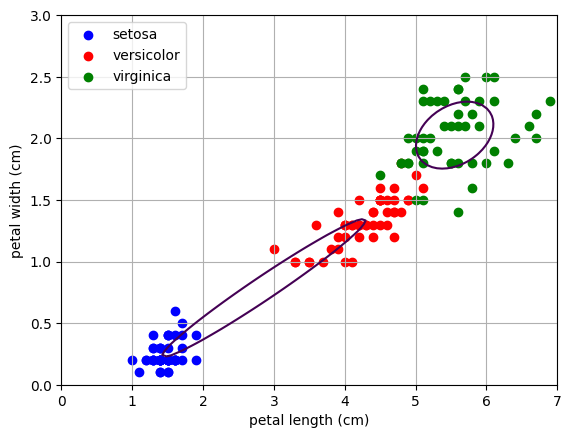

In [22]:
# Plot "not_virginica" covariance contour (so called 1-sigma environment).
z_not_virginica = multivariate_normal.pdf(features_grid, mean_not_virginica, covariance_not_virginica)
levels = [multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), covariance_not_virginica) * np.exp(-0.5 * 1 ** 2)]
plt.contour(x, y, z_not_virginica, levels)

# Plot "virginica" covariance contour (so called 1-sigma environment).
z_virginica = multivariate_normal.pdf(features_grid, mean_virginica, covariance_virginica)
levels = [multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), covariance_virginica) * np.exp(-0.5 * 1 ** 2)]
plt.contour(x, y, z_virginica, levels)

add_scatter_to_plot(ds)
plt.show()

The classes virginica and not virginica have now different covariance matrices, hence the decision boundary will be non linear.

We can now use a numeric approach to find the decision boundary:
 - Calculate the discriminant $g$ for the two class problem: $g(\mathbf{x}) = g_1(\mathbf{x}) - g_2(\mathbf{x})$ for each point in a grid.
     - Hint: `z_virginica` and `z_not_virginica` are the values for $p(\mathbf{x}|\omega_k)$ for a grid.
       You can use them as starting point to calculate the discriminant
 - Calculate the estimated class for each grid point: $g(\mathbf{x})  \overset{\hat{\omega}=\omega_1}{\underset{\hat{\omega}=\omega_2}{\gtrless}} 0$ (Code provided)
 - Visualize the estimated classes (Code provided)

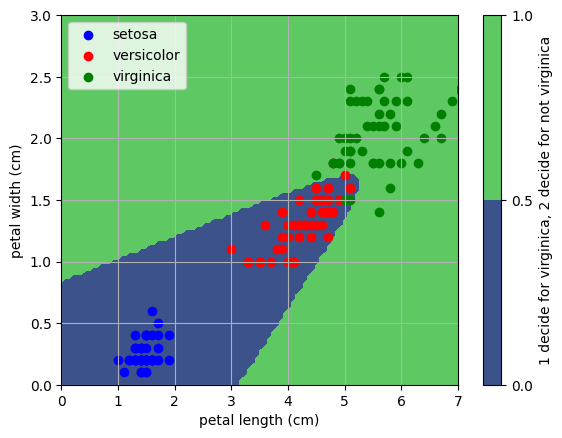

In [23]:
prior_virginica = np.sum(labels == 1) / labels.size  # REPLACE
prior_not_virginica = np.sum(labels == 0) / labels.size  # REPLACE

g = np.log(z_not_virginica * prior_not_virginica) - np.log(z_virginica * prior_virginica)  # REPLACE g = ???

# Plot the estimated classes with the help of a contour plot
plt.contourf(x, y, 0 > g)
plt.colorbar(label='1 decide for virginica, 2 decide for not virginica')

add_scatter_to_plot(ds)
plt.show()

Although the estimator may be more precise using different covariance matrices, it will not yield a linear discriminant.
Therefore, we here simplify the model further to just allow a shared covariance matrix (tied covariance matrix).

## Different mean but tied covariance matrix

To calculate a tied covariance, we need to calculate the mean per class first.
We can then subtract the mean of the corresponding class from each feature.

This is a bit cumbersome.
We may also calculate the mean per class and weight it with the count per class $N_k$.

Please note, that we again ignore any bias correction.

The most robust recipe is as follows ([Scikit-Learn](https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/mixture/gaussian_mixture.py#L172)):
\begin{align}
\boldsymbol\Sigma = \frac 1 N \sum_{n=1}^N \mathbf x_n \mathbf x_n^{\mathsf T} - \frac{1}{N} \sum_{k=1}^K N_k \boldsymbol \mu_k \boldsymbol \mu_k^{\mathsf T}
\end{align}

In [24]:
N_not_virginica = np.sum(labels == 0)  # REPLACE N_not_virginica = ???
N_virginica = np.sum(labels == 1)  # REPLACE N_virginica = ???
N = features.shape[0]  # REPLACE N = ???
tied_covariance = (
    1 / N * np.einsum('nd,nD->dD', features, features)  # REPLACE ???
    - N_not_virginica / N * np.outer(mean_not_virginica, mean_not_virginica)  # REPLACE ???
    - N_virginica / N * np.outer(mean_virginica, mean_virginica)  # REPLACE ???
)
tied_covariance

array([[1.48628467, 0.545452  ],
       [0.545452  , 0.235444  ]])

In [25]:
test_almost_equal(tied_covariance, [[1.48628467, 0.545452], [0.545452, 0.235444]])  # Test vs solution

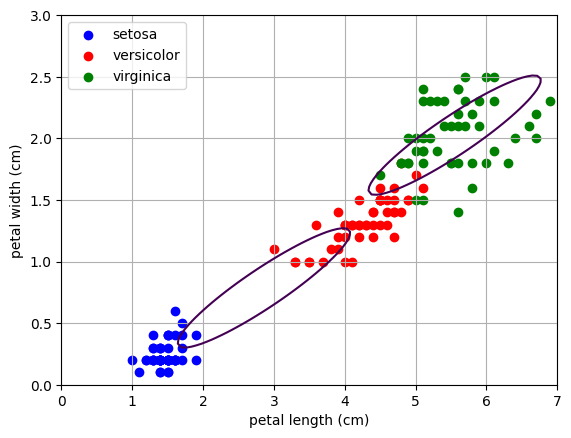

In [26]:
# Plot "not_virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_not_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

# Plot "virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

add_scatter_to_plot(ds)
plt.show()

In [27]:
w_lda = np.linalg.solve(tied_covariance, (mean_not_virginica - mean_virginica))  # REPLACE w_lda = ???
x0_lda = (mean_not_virginica + mean_virginica) / 2  # REPLACE x0_lda = ???
x0_lda = x0_lda - (mean_not_virginica - mean_virginica) / (  # REPLACE
    (mean_not_virginica - mean_virginica).T @ np.linalg.solve(  # REPLACE
        tied_covariance, (mean_not_virginica - mean_virginica)  # REPLACE
    )  # REPLACE
) * np.log((2/3) / (1/3))  # REPLACE
w_lda, x0_lda

(array([ 0.81613039, -7.15737056]), array([4.48577502, 1.5346886 ]))

In [28]:
test_almost_equal(w_lda, [0.81613039, -7.15737056])  # Test vs solution
test_almost_equal(x0_lda, [4.48577502, 1.5346886])  # Test vs solution

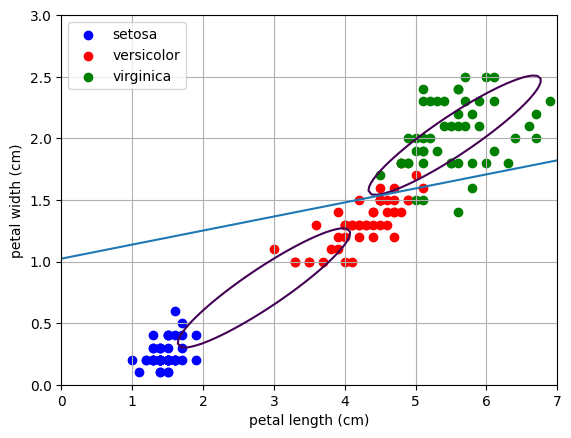

In [29]:
# Plot "not_virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_not_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

# Plot "virginica" covariance contour (so called 1-sigma environment).
z = multivariate_normal.pdf(features_grid, mean_virginica, tied_covariance)
plt.contour(x, y, z, [
    multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
])

x_linspace = np.linspace(0, 7, 2)
plt.plot(x_linspace, -w_lda[0] / w_lda[1] * x_linspace + w_lda[0] / w_lda[1] * x0_lda[0] + x0_lda[1])

add_scatter_to_plot(ds)
plt.show()

# Softmax regression

Perform a logistic regression for the three class problem.
- Implement a softmax function.
- Derive the gradient for the softmax regression.
- Implement gradient ascent for the softmax regression.

In [30]:
def softmax(x, axis=-1):
    return np.exp(x) / np.sum(np.exp(x), axis=axis, keepdims=True)  # REPLACE return ???
# REPLACE
print(np.sum(np.ones((2, 2)), axis=1, keepdims=True).shape)  # REPLACE
print(softmax([  # REPLACE
    [0, 0],  # REPLACE
    [0, 0],  # REPLACE
    [0, 0]  # REPLACE
], axis=1))  # REPLACE

(2, 1)
[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [31]:
test_data = np.random.normal(size=(3, 4))
actual = np.sum(softmax(test_data), axis=-1)
desired = np.ones((3,))
np.testing.assert_allclose(actual, desired)

\begin{align}
L &= \prod_{n=1}^{N} \prod_{k=1}^{K} p_k^{c_{n,k}} \\
\ell &= \sum_{n=1}^{N} \sum_{k=1}^{K} c_{n,k} \ln \frac{
\mathrm e^{\mathbf w_k^{\mathsf T} \mathbf x_n + w_{0,k}}
}{
\sum_{k'=1}^K \mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}
} \\
&= \sum_{n=1}^{N} \sum_{k=1}^{K} c_{n,k} \ln \left(\mathrm e^{\mathbf w_k^{\mathsf T} \mathbf x_n + w_{0,k}}\right)
- \sum_{n=1}^{N} \sum_{k=1}^{K} c_{n,k} c_{n,k} \ln \left(\sum_{k'=1}^K \mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}\right) \\
&= \sum_{n=1}^{N} \sum_{k=1}^{K} c_{n,k} \mathbf w_k^{\mathsf T} \mathbf x_n + w_{0,k}
- \sum_{n=1}^{N} \ln \left(\sum_{k'=1}^K \mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}\right) \\
\frac{\partial \ell}{\partial w_{0,k}} &= \sum_{n=1}^{N} \left( c_{n,k} -\frac{
\mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}
}{
\sum_{k'=1}^K \mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}
} \right) \\
\frac{\partial \ell}{\partial w_{0,k}} &= \sum_{n=1}^{N} \left( c_{n,k}x_{n,d} -\frac{
\mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}
}{
\sum_{k'=1}^K \mathrm e^{\mathbf w_{k'}^{\mathsf T} \mathbf x_n + w_{0,k'}}
}x_{n,d} \right)
\end{align}

In [32]:
features = ds['data'][:, 2:]
features.shape

(150, 2)

In [33]:
def labels_to_one_hot(labels, num_classes=None):
    """Experiment with inputs to this function, to check what it does."""
    num_classes = np.max(labels) + 1 if num_classes is None else num_classes
    return np.eye(num_classes)[labels]

labels_one_hot = labels_to_one_hot(ds['target'])
print(labels_one_hot.shape)
labels_one_hot[123, :]

(150, 3)


array([0., 0., 1.])

In [34]:
actual = labels_to_one_hot([2], num_classes=4)
desired = [0, 0, 1, 0]
assert np.all(np.equal(actual, desired))

We can now state an alternative relation between `softmax` and `argmax`:

In [35]:
softmax([10, 20, 30])

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

In [36]:
np.argmax([10, 20, 30])

2

In [37]:
labels_to_one_hot(np.argmax([10, 20, 30]), num_classes=3)

array([0., 0., 1.])

In [38]:
D = 2
K = 3
w = np.zeros((D, K))
w0 = np.zeros((K,))

iterations = 1000  # REPLACE iterations = ???
learning_rate = 0.1  # REPLACE learning_rate = ???
for _ in range(iterations):
    grad_w0 = np.sum(labels_one_hot, axis=0) - np.sum(softmax(features @ w + w0), axis=0)  # REPLACE grad_w0 = ???
    grad_w = features.T @ labels_one_hot - features.T @ softmax(features @ w + w0)  # REPLACE grad_w = ???
    
    assert grad_w0.shape == (K,), grad_w0.shape
    assert grad_w.shape == (D, K), grad_w.shape
    
    # Gradient ascent, since we want to maximize the log-likelihood.
    w0 = w0 + learning_rate * grad_w0  # REPLACE w0 = ???
    w = w + learning_rate * grad_w  # REPLACE w = ???
    
    assert w0.shape == (K,), w0.shape
    assert w.shape == (D, K), w.shape

w, w0, grad_w0

(array([[-16.85726718,  -3.66167771,  20.51894489],
        [-50.4444989 , -18.79119278,  69.23569167]]),
 array([ 122.18697363,   68.22464712, -190.41162075]),
 array([ 1.20079689e-06,  1.30118221e-02, -1.30130229e-02]))

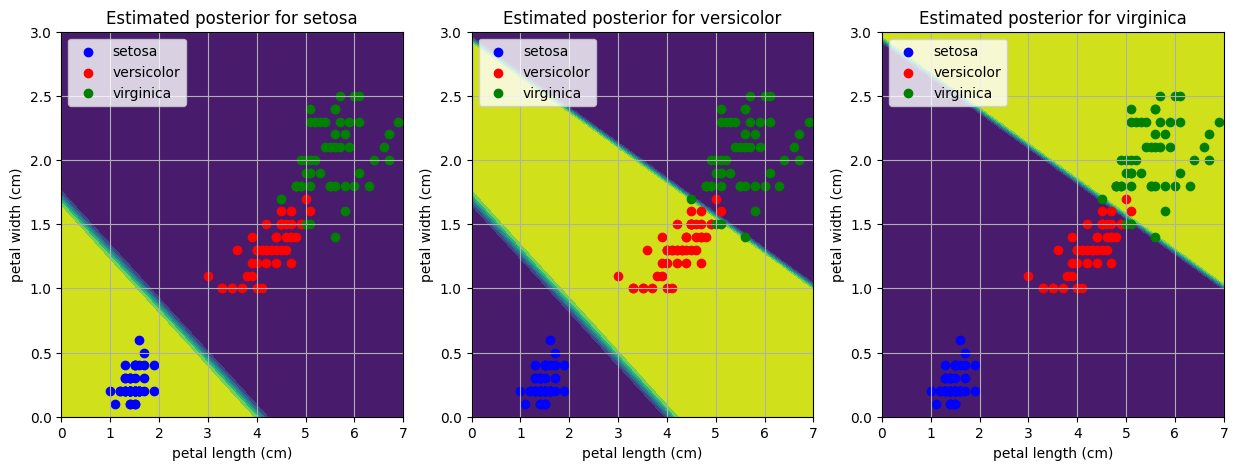

In [39]:
steps = 100
x, y, features_grid = compute_complete_grid((0, 7), (0, 3), steps=steps)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for k, ax in enumerate(axes):
    z = softmax(features_grid @ w + w0)[..., k]
    ax.contourf(x, y, z)
    ax.set_title('Estimated posterior for {}'.format(ds['target_names'][k]))

    for target_index, (target_name, color) in enumerate(zip(ds['target_names'], ['blue', 'red', 'green'])):
        X = ds['data'][ds['target'] == target_index, :]
        ax.scatter(X[:, 2], X[:, 3], c=color, label=target_name)
    ax.legend()
    ax.set_xlabel(ds['feature_names'][2])
    ax.set_ylabel(ds['feature_names'][3])
plt.show()

# Perform LDA for the three class problem

Now perform an LDA for the three class problem and visualize the decision boundaries.

In [40]:
features = ds['data'][:, 2:]
features.shape

(150, 2)

In [41]:
def labels_to_one_hot(labels, num_classes=None):
    """Experiment with inputs to this function, to check what it does."""
    num_classes = np.max(labels) + 1 if num_classes is None else num_classes
    return np.eye(num_classes)[labels]

In [42]:
labels = labels_to_one_hot(ds['target'])
labels.shape

(150, 3)

In [43]:
N = features.shape[0]
counts = np.sum(labels, axis=0)  # REPLACE counts = ???
means = np.einsum('k,nk,nd->kd', 1 / counts, labels, features)  # REPLACE means = ???
covariances = np.einsum('k,nk,knd,knD->kdD', 1 / counts, labels, features[None, :, :] - means[:, None, :], features[None, :, :] - means[:, None, :])  # REPLACE
tied_covariance = np.einsum('k,kdD->dD', counts, covariances) / N  # REPLACE tied_covariance = ???

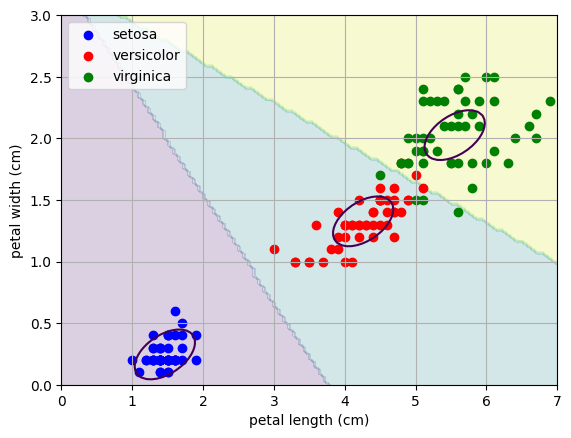

In [44]:
K = 3  # Number of classes

for k in range(K):
    z = multivariate_normal.pdf(features_grid, means[k, :], tied_covariance)
    
    levels = [
        multivariate_normal.pdf(np.zeros((D,)), np.zeros((D,)), tied_covariance) * np.exp(-0.5 * 1 ** 2)
    ]
    plt.contour(x, y, z, levels)
    
z = np.stack([multivariate_normal.pdf(features_grid, means[k, :], tied_covariance) for k in range(K)])
c_hat = np.argmax(z, axis=0)

plt.contourf(x, y, c_hat, alpha=0.2)

add_scatter_to_plot(ds)
    
plt.legend()

plt.xlabel(ds['feature_names'][2])
plt.ylabel(ds['feature_names'][3])
plt.show()

# Apply the MAP criterion and calculate accuracy for each 3-class estimator

Apply the MAP criterion for both classifiers and calculate the accuracy.

In [45]:
p_hat = softmax(features @ w + w0)  # REPLACE p_hat = ???
c_hat = np.argmax(p_hat, axis=-1)  # REPLACE c_hat = ???
correct = np.sum(np.equal(c_hat, ds['target']))
N = len(ds['target'])
print('Accuracy: {} %'.format(correct / N * 100))

Accuracy: 96.0 %


In [46]:
z = np.stack([  # REPLACE z = ???
    np.mean(labels[:, k]) * multivariate_normal.pdf(features, means[k, :], tied_covariance)  # REPLACE
    for k in range(K)])  # REPLACE
c_hat = np.argmax(z, axis=0)  # REPLACE c_hat = ???
correct = np.sum(np.equal(c_hat, ds['target']))
N = len(ds['target'])
print('Accuracy: {} %'.format(correct / N * 100))

Accuracy: 96.0 %


# Outlook: Pandas DataFrame
Pandas DataFrame provides a table based view on data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


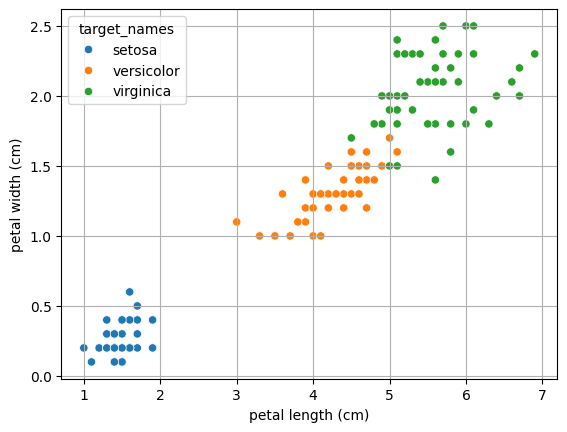

In [47]:
df = pd.DataFrame(
    ds.data,
    columns=ds.feature_names,
)
df = pd.concat([df, pd.DataFrame([ds.target_names[t] for t in ds.target], columns=['target_names'])], axis=1)
seaborn.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='target_names')
df.head()

# For experts...

You can also `from sklearn.linear_model import LogisticRegression` and apply it to our dataset.
It has way more parameters than our algorithm. Check especially, what the control parameter `C` does [1].
Can you spot at least the code [2], which performs the prediction?

- [1] http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- [2] https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/linear_model/logistic.py#L962

# Further reading
- Logistic regression for a related problem: http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
- How are tied covariance matrices enforced? https://stats.stackexchange.com/questions/175477/how-is-the-tied-covariance-matrix-enforced-in-linear-discriminant-analysis
- Softmax regression tutorial: http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/